# Plot and calculate path-based similarity in Python

In [1]:
# import nltk
# nltk.download('wordnet')

In [2]:
from nltk.corpus import wordnet as wn
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Plot path-based similarity

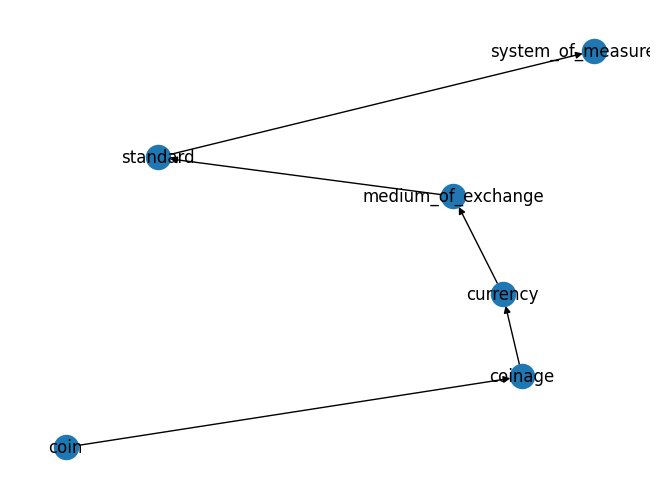

In [3]:
def plot_hypernym_hierarchy(synset_name):
    # Create a directed graph
    G = nx.DiGraph()

    # Function to recursively plot hypernyms
    def recurse_hypernyms(synset, depth):
        if depth > 0:  # You can adjust depth to limit the hierarchy levels
            for hypernym in synset.hypernyms():
                G.add_node(hypernym.name(), label=hypernym.lemma_names()[0])
                G.add_edge(synset.name(), hypernym.name())
                recurse_hypernyms(hypernym, depth - 1)

    # Start with the target synset
    target_synset = wn.synset(synset_name)
    G.add_node(target_synset.name(), label=target_synset.lemma_names()[0])
    recurse_hypernyms(target_synset, 5)  # Adjust the depth as needed

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
    plt.show()


plot_hypernym_hierarchy('coin.n.01')

## Calculate path-based similarity between two words

In [4]:
# Find the best similarity score between the synsets of two words
def best_similarity_score(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)

    best_score = 0
    for synset1 in synsets1:
        for synset2 in synsets2:
            # Using path similarity
            score = synset1.path_similarity(synset2)
            if score and score > best_score:
                best_score = score
    return best_score

In [5]:
word_pairs = [("dime", "nickel"), 
              ("dime", "money"), 
              ("dime", "standard"), 
              ("dime", "fish"),
              ("dime", "professor"),              
             ]

# Compute similarities and return them in a DataFrame
def similarity_dataframe(word_pairs):
    # Calculating similarities
    similarities = [(word1, word2, round(best_similarity_score(word1, word2), 3))
                    for word1, word2 in word_pairs]
    
    # Creating DataFrame
    df = pd.DataFrame(similarities, columns=['Word1', 'Word2', 'Similarity'])
    df.sort_values(by='Similarity', ascending=False, inplace=True)

    return df


df_similarity = similarity_dataframe(word_pairs)
display(df_similarity)

,Word1,Word2,Similarity
0,dime,nickel,0.333
1,dime,money,0.200
2,dime,standard,0.167
3,dime,fish,0.083
4,dime,professor,0.062


In [6]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Sun, 14 January 2024 16:31:01'